___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

## Principle Component Analysis

- PCA is a dimensionality reduction technique. It can be used to reduce the number of features in a dataset while retaining as much information as possible.
- PCA is a linear transformation technique. It transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

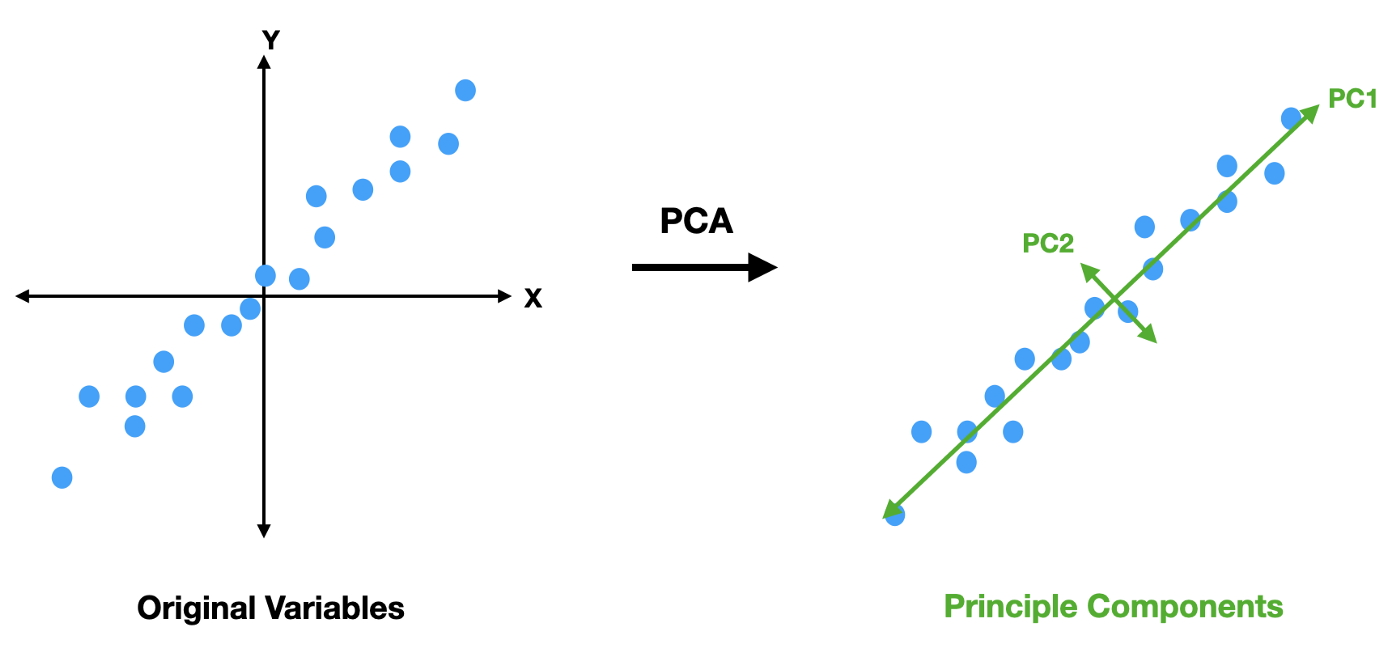

- Inverse transform can be used to reconstruct the original data from the reduced data. But the reconstructed data will not be exactly the same as the original data. The reconstruction error is the difference between the original data and the reconstructed data.

### How to perform PCA in Python?
- PCA can be performed using the PCA class in scikit-learn.
- The PCA class has two important parameters:
    - `n_components`: The number of principal components to return. If None, all components are kept.
    - `whiten`: When True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
- The `fit()` function is used to learn the principal components from the training data.
- The `transform()` function is used to apply the dimensionality reduction on the training data.
- The `fit_transform()` function is used to both learn the principal components and apply the dimensionality reduction on the training data.
- The `inverse_transform()` function is used to reconstruct the original data from the reduced data.

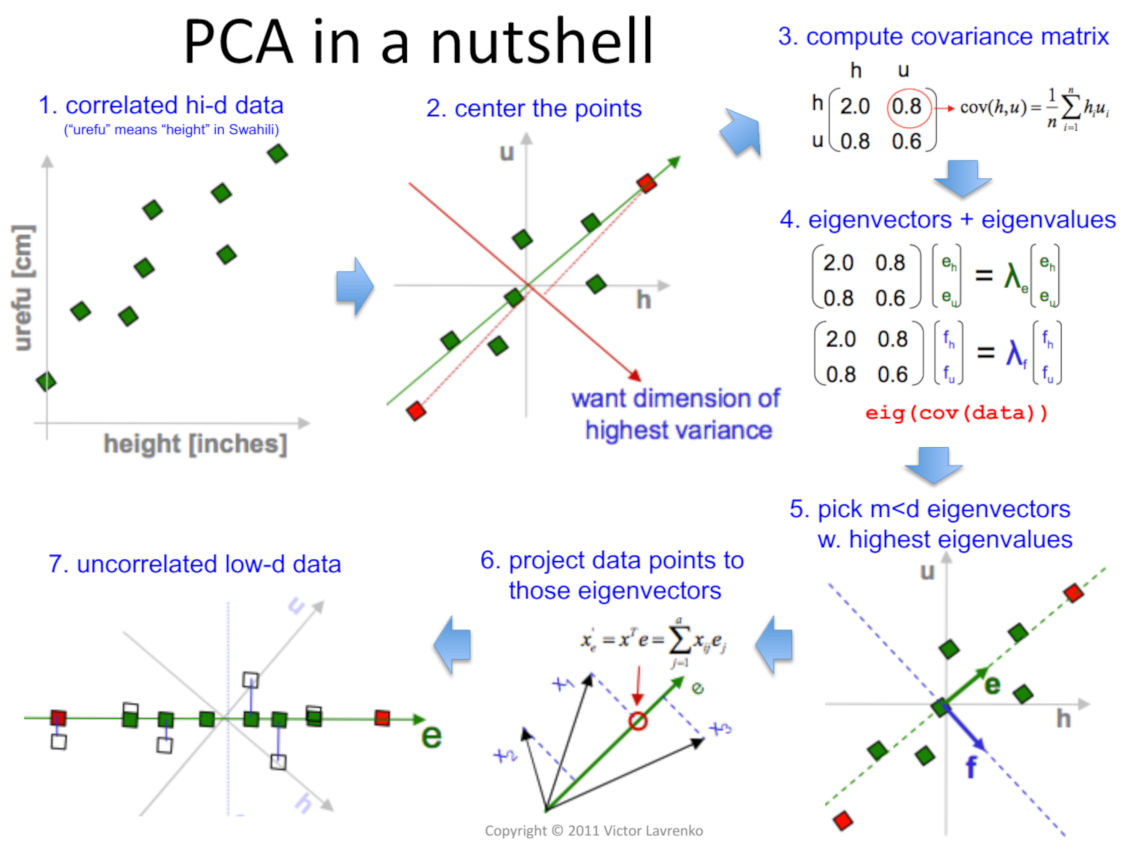




### How to choose the number of principal components?
- The number of principal components can be chosen using the `explained_variance_ratio_` attribute.
- The `explained_variance_ratio_` attribute returns the variance caused by each of the principal components.
- The cumulative sum of `explained_variance_ratio_` gives the cumulative variance caused by the principal components.
- The number of principal components can be chosen such that the cumulative variance is greater than a threshold value.
- Generally reduced data contains at least 95% of original data information

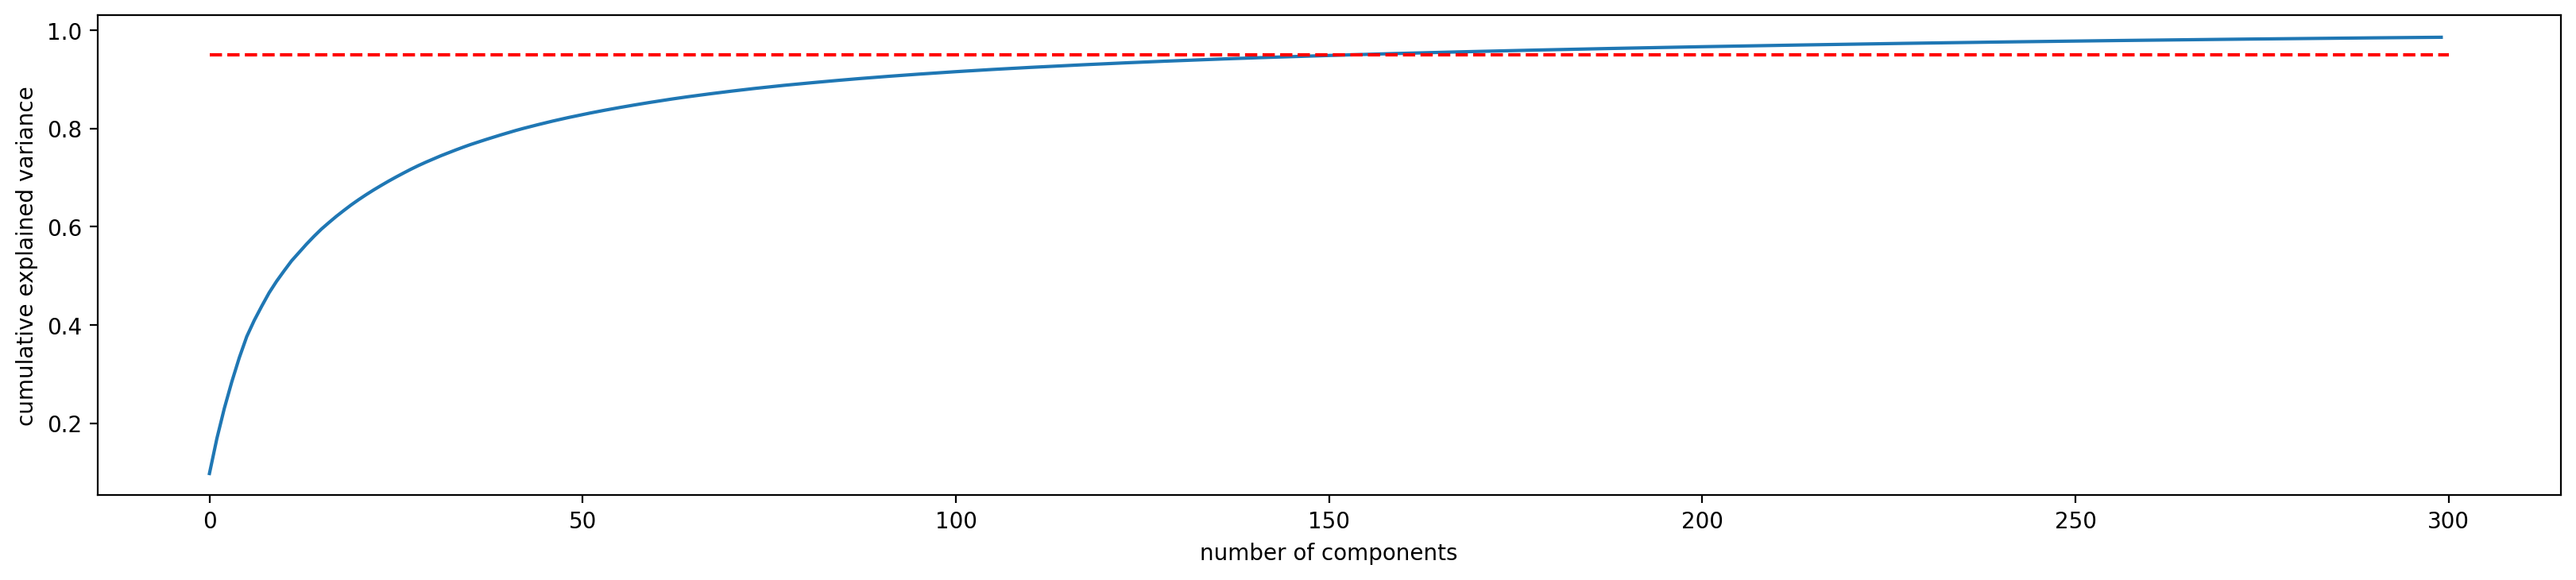

### MNIST Dataset
https://www.openml.org/search?type=data&sort=runs&id=554&status=active

- The MNIST dataset is a collection of handwritten digits.
- The dataset contains 70,000 images of handwritten digits.
- Each image is 28x28 pixels.
- Each pixel has a value between 0 and 255.
- Each image is a 784-dimensional vector.
- Each image belongs to one of the 10 classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).


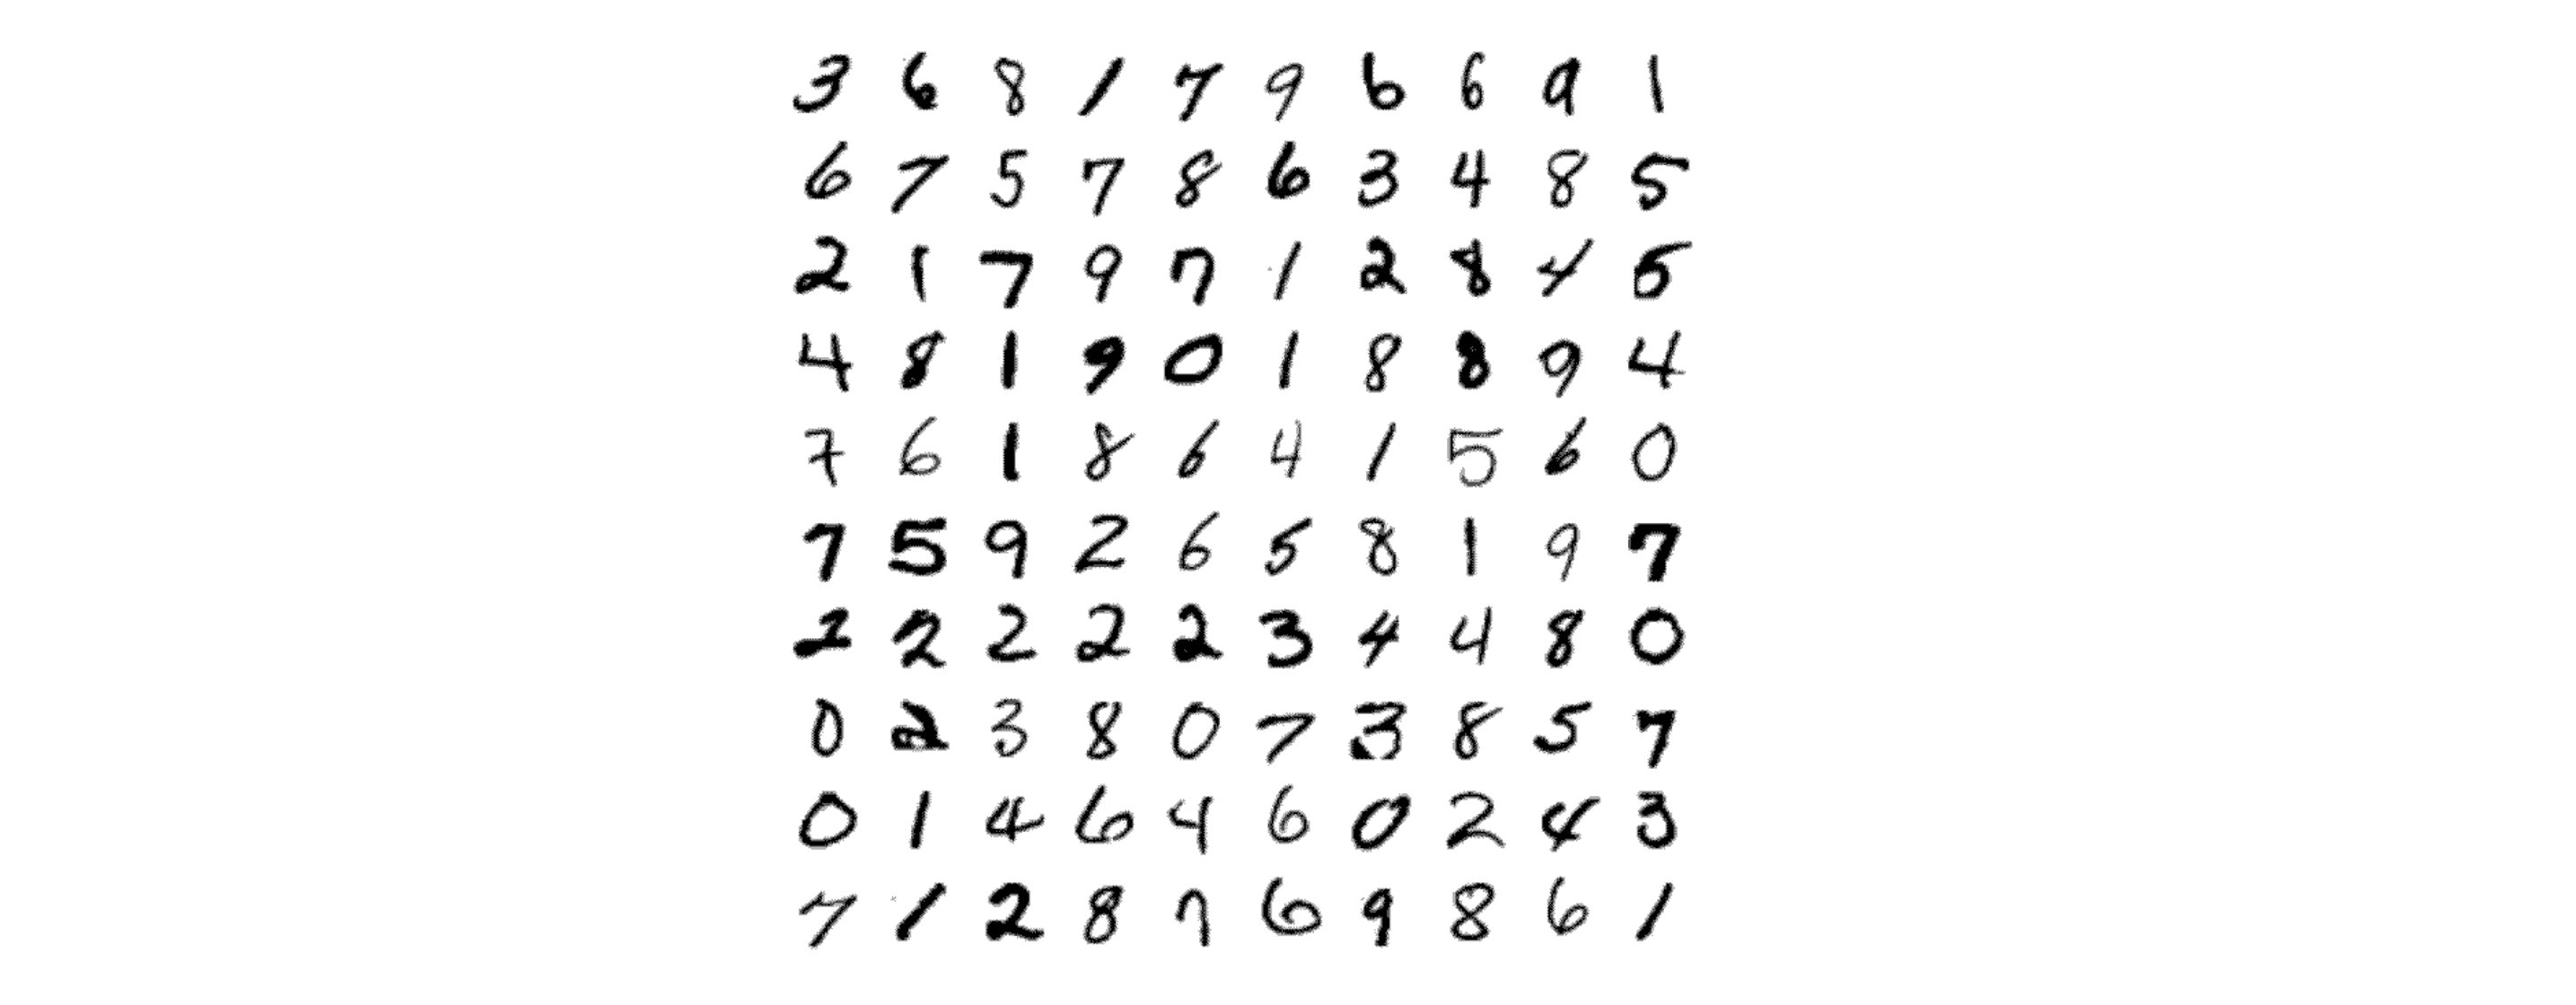

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
# print(mnist.DESCR)

In [19]:
X = mnist.data
y = mnist.target

In [20]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA Model Building and Its Application
- PCA can be used to reduce the dimensionality of the data.
- PCA Application
    - Compression
    - Visualization
    - Noise Filtering
    - Feature Extraction and Engineering
    - etc

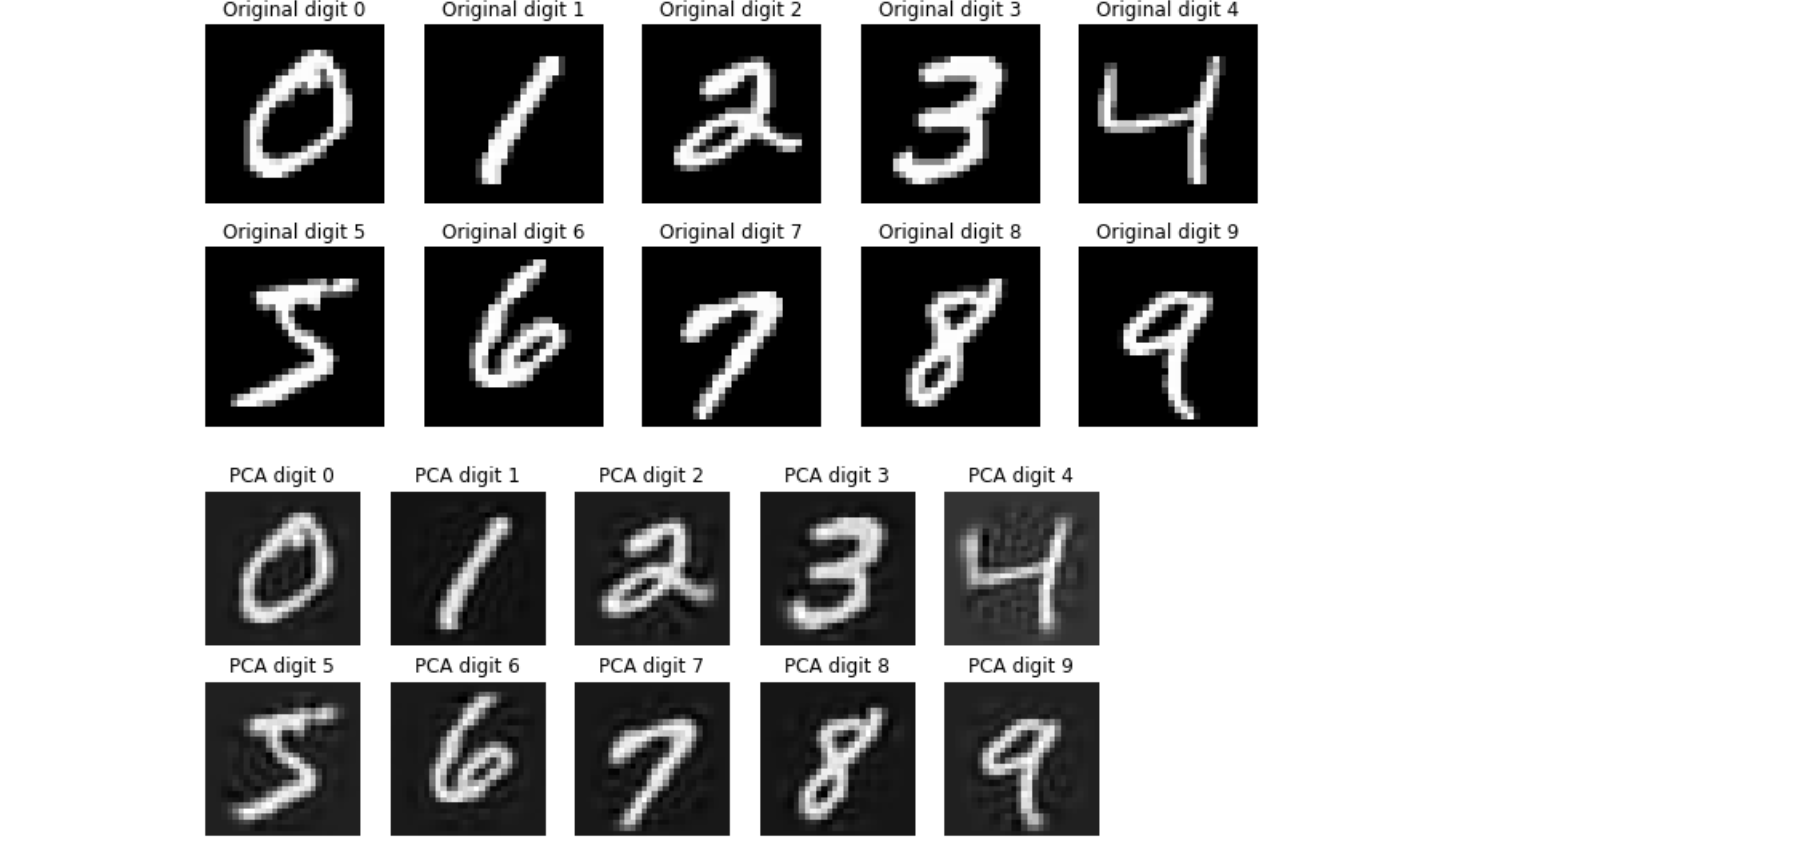

In [21]:
from sklearn.decomposition import PCA

In [22]:
X.shape

(70000, 784)

In [27]:
pca = PCA(n_components=2)

pca.fit(X)
X_pca = pca.transform(X)

# X_pca = pca.fit_transform(X)

In [28]:
X_pca.shape

(70000, 2)

In [33]:
y = y.astype('int')

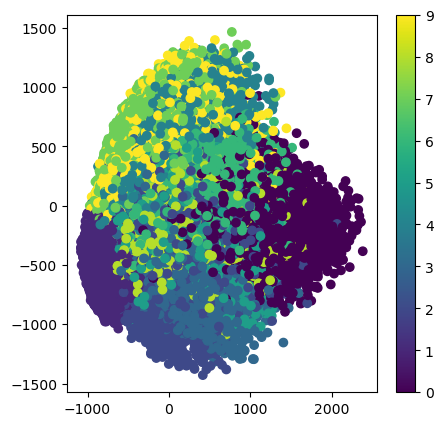

In [35]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.colorbar()
plt.show()

#### Data Compression Analysis

In [36]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

In [39]:
X.shape[1]/X_pca.shape[1]

392.0

In [45]:
import sys
sys.getsizeof(X)//(2**20), 418/392, sys.getsizeof(X_pca)/(2**20)

(418, 1.066326530612245, 1.0682296752929688)

### Data Reconstruction or Inverse Transform

In [47]:
X_recovered = pca.inverse_transform(X_pca)
X_recovered.shape

(70000, 784)

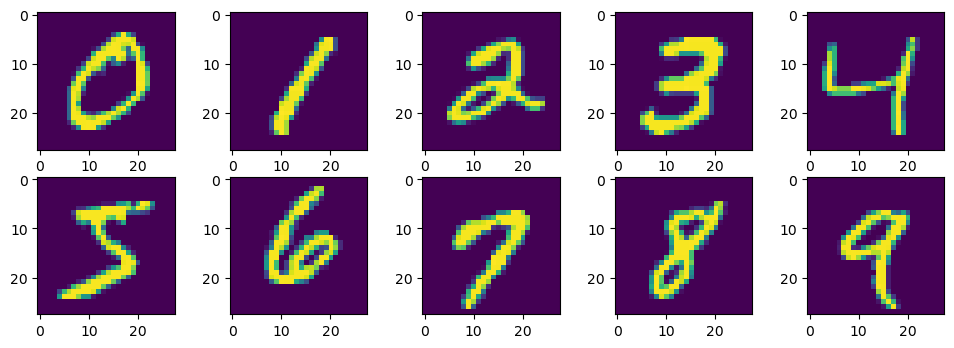

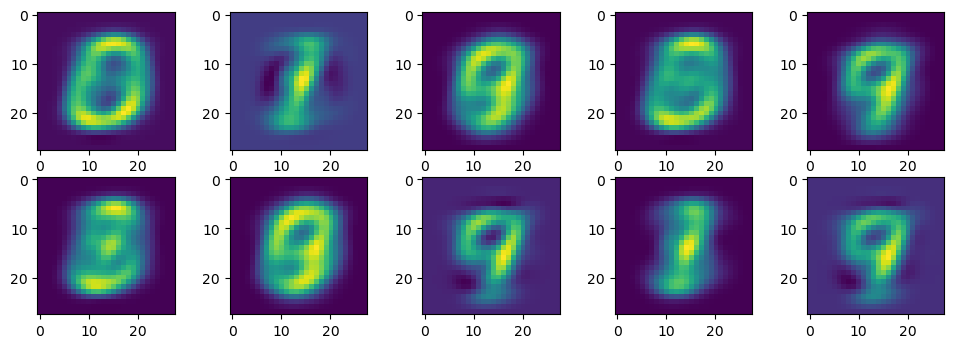

In [89]:
digits = y.unique()
digits.sort()

plt.figure(figsize=(12,4))
for i in digits:
    plt.subplot(2,5, i+1)
    plt.imshow(X[y==i].iloc[0].to_numpy().reshape(28,28))
#     plt.title('Digit {}'.format(i))
#     plt.tight_layout()
    
    
plt.figure(figsize=(12,4))
for i in digits:
    plt.subplot(2,5, i+1)
    plt.imshow(X_recovered[y==i][0].reshape(28,28))

#### Choosing Right Number of the Principle Components
- The explained variance ratio is a good way to choose the number of principle components
- The explained variance ratio is the ratio of the variance of each principle component to the total variance
- The total variance is the sum of the variance of all principle components
- The explained variance ratio is the percentage of the total variance that each principle component accounts for
- The sum of the explained variance ratios is always 1

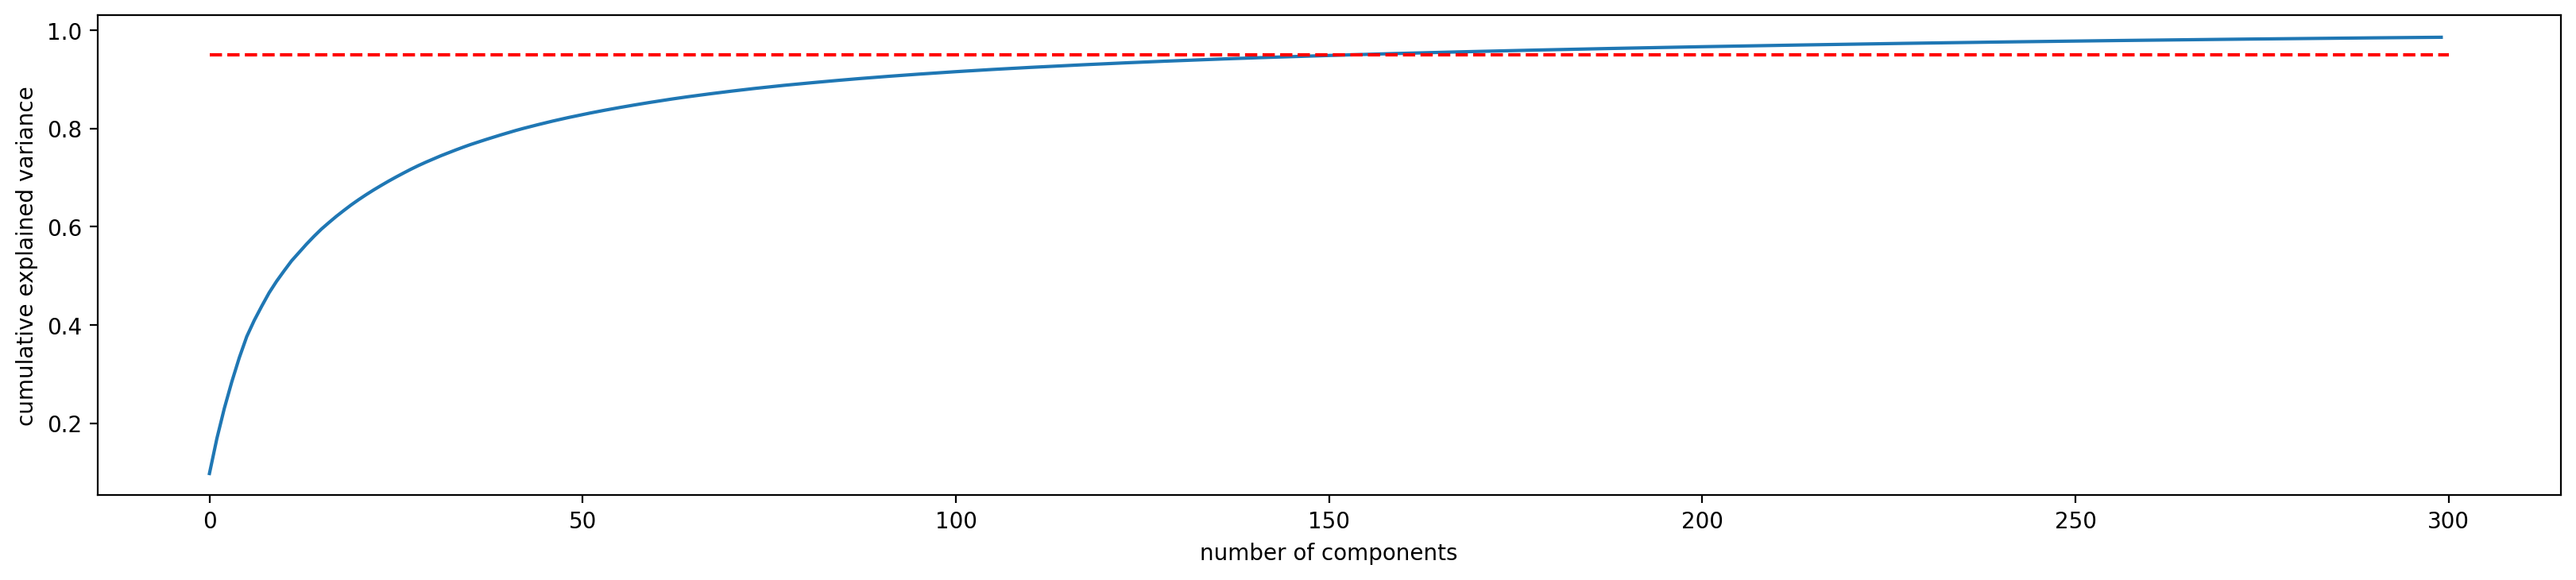

In [90]:
pca = PCA(n_components=300)
pca.fit(X)

PCA(n_components=300)

Text(0.5, 1.0, 'Variance vs No. of Components')

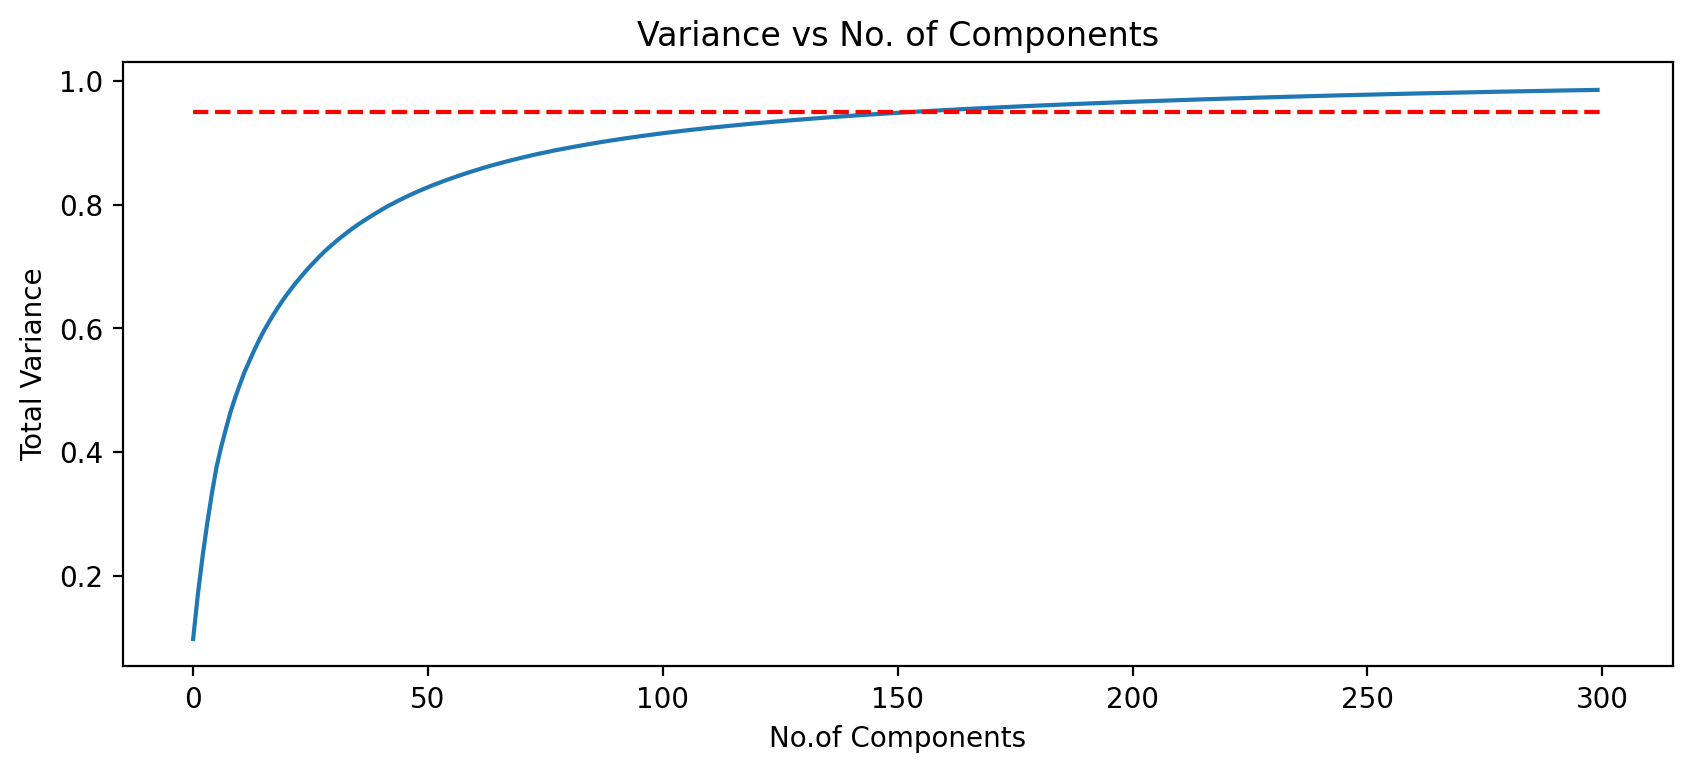

In [95]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,4), dpi=200)
plt.plot(cumsum)
plt.plot([0, 300], [0.95, 0.95], 'r--')

plt.xlabel('No.of Components')
plt.ylabel('Total Variance')
plt.title('Variance vs No. of Components')

In [98]:
idx = sum(cumsum<=0.95)
idx

153

In [99]:
pca = PCA(n_components=idx)
pca.fit(X)

PCA(n_components=153)

In [102]:
sum(pca.explained_variance_ratio_)

0.9495358896975359

#### Data Reconstruction 

In [103]:
X_pca = pca.fit_transform(X)
X_pca.shape

(70000, 153)

In [104]:
X_recovered = pca.inverse_transform(X_pca)

In [105]:
X_recovered.shape

(70000, 784)

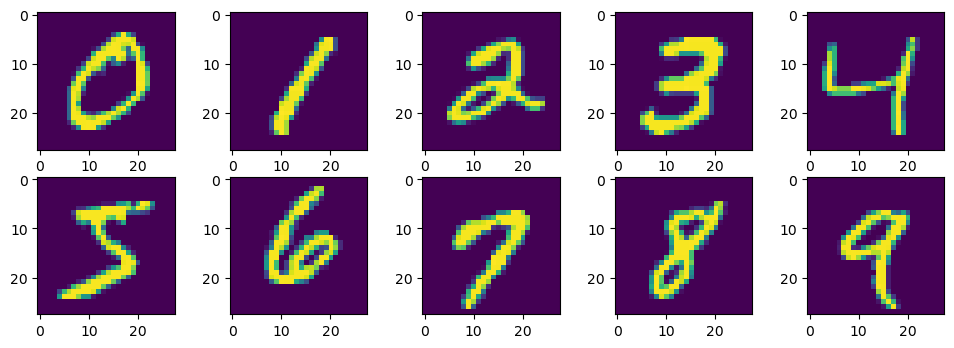

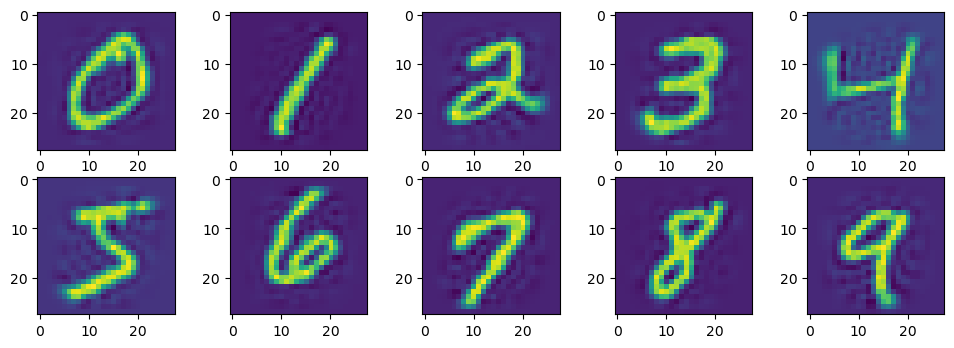

In [111]:
digits = y.unique()
digits.sort()

plt.figure(figsize=(12,4))
for i in digits:
    plt.subplot(2,5, i+1)
    plt.imshow(X[y==i].iloc[0].to_numpy().reshape(28,28))
#     plt.title('Digit {}'.format(i))
#     plt.tight_layout()
    
    
plt.figure(figsize=(12,4))
for i in digits:
    plt.subplot(2,5, i+1)
    plt.imshow(X_recovered[y==i][0].reshape(28,28))

In [129]:
X.shape[1]/X_pca.shape[1]

5.124183006535947

In [130]:
418/5.12

81.640625

### Classification Comparison with and without PCA

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import time

In [135]:
start = time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                     random_state=42)
model = LogisticRegression(n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('classification_report:', classification_report(y_test, y_pred))
print(time.time()-start)

classification_report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.91      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.85      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.87      0.87      0.87      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

38.7886106967926


In [136]:
start = time.time()
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,
                                                     random_state=42)
model = LogisticRegression(n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('classification_report:', classification_report(y_test, y_pred))
print(time.time()-start)

classification_report:               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1343
           1       0.92      0.97      0.95      1600
           2       0.92      0.90      0.91      1380
           3       0.90      0.88      0.89      1433
           4       0.91      0.92      0.91      1295
           5       0.88      0.87      0.87      1273
           6       0.94      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.91      0.85      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

11.202364444732666


# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
